<center>7MRI0020 Scientific Programming - 2021/2022

coursework #1

Testing</center>

___

Submission deadline: Thursday 11th November 2021 - 4pm

Submit your 2 python code files (code and test) as a single zip file via
the corresponding section on the module Keats page.
___

The aim of this coursework is to complete some of the methods of the class
`PiecewiseLinearFunction` in the file `piecewise_linear_function.py` and the
associated unit tests in the file `test_piecewise_linear_function.py`. Note
that the term `Function` in the class name relate to a mathematical function
rather than a method.

`PiecewiseLinearFunction` is intended to represent a 1-dimensional mathematical
function parametrised by points. Each point has a coordinate and an associated
value. All points are encoded as a dictionary where the coordinates are the
keys. As a result one coordinate can only be associated with a single value.

The `interp` and `extrap` methods enable to interpolate or extrapolate the 
function value at any coordinate. Only nearest neighbour inter- and
extra-polation have been implemented. You will have to implement the linear
interpolation and extrapolation.

Linear interpolation is effectively a weighted sum of the values associated
with the two surrounding neighbours of a coordinate. For example, considering
two points, A and B at coordiwnate 10 and 15 respectively and with associated
values of 5 and -5, one can interpolate the value of any coordinate C in the
range [10;15] as follow: 

$ratio = (C-A)/(B-A)$

$value[C] = value[A] * (1-ratio) + value[B] * ratio$

An illustration is shown in the cell below.

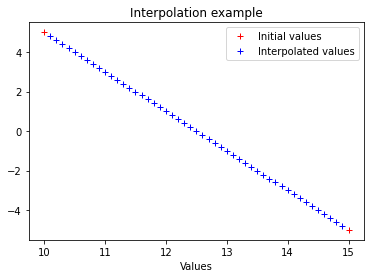

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

value={10:5, 15:-5}
plt.plot(value.keys(), value.values(), 'r+', label='Initial values')
interp = lambda c: value[10] * (1-(c-10)/(15-10)) + value[15] * (c-10)/(15-10)
coord = [10 + x * 0.1 for x in range(1, 50)]
plt.plot(coord, list(map(interp, coord)), 'b+', label='Interpolated values')
plt.title('Interpolation example')
plt.xlabel('Coordinates')
plt.xlabel('Values')
plt.legend(loc="upper right")
plt.show()

For the purpose of extrapolation, meaning when values are available only on one
side of the required coordinate, one could consider extrapolating from the two
closest available points as illustrated in the cell below.

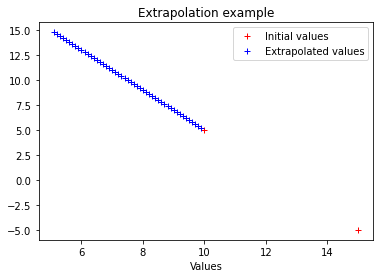

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

value={10:5, 15:-5}
plt.plot(value.keys(), value.values(), 'r+', label='Initial values')
interp = lambda c: value[10] * (1-(c-10)/(15-10)) + value[15] * (c-10)/(15-10)
coord = [5 + x * 0.1 for x in range(1, 50)]
plt.plot(coord, list(map(interp, coord)), 'b+', label='Extrapolated values')
plt.title('Extrapolation example')
plt.xlabel('Coordinates')
plt.xlabel('Values')
plt.legend(loc="upper right")
plt.show()

1. Complete the `interp` and `extrap` methods to ensure linear interpolation can
be used [20 marks]. 

2. Write as many associated unit tests as you think are
required [20 marks]. 

As mentioned during the lectures, do focus on edge cases.
Note that you are not expected to import any further modules (libraries) and you
should take advantage of the features of the language where possible
(idiomatic python - Week 02).

3. The class constructor, the `__init__` method, is incomplete as many of the
provided tests still fail. Do complete the method [10 marks],

4. comment the code [10 marks] and 

5. comment the unit tests [10 marks].
Ensure that your comments are meaningful. You can refer to
[this page](https://realpython.com/python-comments-guide/) for recommendations
about good commenting practices.


6. The operator `+` has been defined for the class but we have not defined the
`+=` operator. Write the method to define the `+=` operator to support the
addition of a an object of the class or any real number [10 marks].


7. Write the associated tests to ensure your code behaves as expected [10 marks].


8. While writing your code and comments, you are expected to adhere to Python
style guidelines (see https://www.python.org/dev/peps/pep-0008).
Your code will be assessed with static and style analysis tools
(as seen in Week 03 - Part 02 material) to detect any potential
defects [10 marks].


Below is an illustrative use of the PiecewiseLinearFunction class, where two
objects are created then their addition is stored in a new object and finally
all objects are displayed in the form of a cloud of points.

In [3]:
fct1 = PiecewiseLinearFunction(zip(
    (random.sample(range(-1000, 1000), 10)),
    (random.uniform(-100, 100) for i in range(10))
), interpolation='nearestNeighboor')
fct1.min_coord()

NameError: name 'PiecewiseLinearFunction' is not defined

In [ ]:
fct2 = PiecewiseLinearFunction(rand_num_values=10, interpolation='nearestNeighboor')
fct2.min_coord()

In [ ]:
fct1 + fct2

In [4]:
from piecewise_linear_function import PiecewiseLinearFunction
import random

seed = 100

random.seed(seed)
fct1 = PiecewiseLinearFunction(zip(
    (random.sample(range(-1000, 1000), 10)),
    (random.uniform(-100, 100) for i in range(10))
), interpolation='nearestNeighboor')

fct2 = PiecewiseLinearFunction(rand_num_values=10, interpolation='linear')

fct3 = fct1 + fct2

plt.figure()
plt.plot(
    *fct1.get_lists_sorted_by_coord(), 'r-',
    *fct2.get_lists_sorted_by_coord(), 'b-',
    *fct3.get_lists_sorted_by_coord(), 'k-')

plt.show()

random.seed(seed)
fct1 = PiecewiseLinearFunction(zip(
    (random.sample(range(-1000, 1000), 10)),
    (random.uniform(-100, 100) for i in range(10))
), interpolation='linear')
fct2 = PiecewiseLinearFunction(rand_num_values=10, interpolation='linear')

fct3 = fct1 + fct2

plt.plot(
    *fct1.get_lists_sorted_by_coord(), 'r-',
    *fct2.get_lists_sorted_by_coord(), 'b-',
    *fct3.get_lists_sorted_by_coord(), 'k-')






plt.show()




TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [ ]:
import numpy as np

In [ ]:
min_value, max_value = 10, 20
x_vals = np.array([min_value, 15, max_value])
y_vals = np.array([5, 2, 7])

coord_dict = {x: y for x, y in zip(x_vals, y_vals)}

mesh_x = np.linspace(min_value, max_value, 11)

my_plc = PiecewiseLinearFunction(values=coord_dict, interpolation='linear', extrapolation='nearestNeighboor')
mesh_y = [my_plc.interp(x) for x in mesh_x]

coords_interp = {x: y for x, y in zip(mesh_x, mesh_y)}


plt.figure()
plt.scatter(coord_dict.keys(), coord_dict.values(), label='original', marker='x', c='r', s=150)
plt.scatter(coords_interp.keys(), coords_interp.values(), label='preds', marker='o', c='b')

plt.legend()
plt.show()

In [ ]:
min_value, max_value = 10, 20
x_vals = np.array([min_value, 15, max_value])
y_vals = np.array([5, 9, 7])

coord_dict = {x: y for x, y in zip(x_vals, y_vals)}

mesh_x = np.linspace(max_value-10, max_value+10, 11)

my_plc = PiecewiseLinearFunction(values=coord_dict, interpolation='linear', extrapolation='linear')
mesh_y = [my_plc.interp(x) for x in mesh_x]

coords_interp = {x: y for x, y in zip(mesh_x, mesh_y)}


plt.figure()
plt.scatter(coord_dict.keys(), coord_dict.values(), label='original', marker='x', c='r', s=150)
plt.scatter(coords_interp.keys(), coords_interp.values(), label='preds', marker='o', c='b')

plt.legend()
plt.show()

In [ ]:
a = [1, 2, 3, 4]
a

In [ ]:
fct1 += fct2

In [ ]:
fct1

In [ ]:
a = zip(
    (random.sample(range(-1000, 1000), 10)),
    (random.uniform(-100, 100) for i in range(10))
)

In [ ]:
dict(a)